<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization - Stacked Charts**


### Student Author: Abigail Hedden

## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Set-up


In [11]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Download and Load the Data**


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-18 11:14:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  11.0MB/s    in 9.7s    

2025-07-18 11:14:30 (15.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



In [26]:
df = pd.read_csv("survey-data.csv")

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
for col in df.columns:
    print(col)

ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

### Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [7]:
df.Age.unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

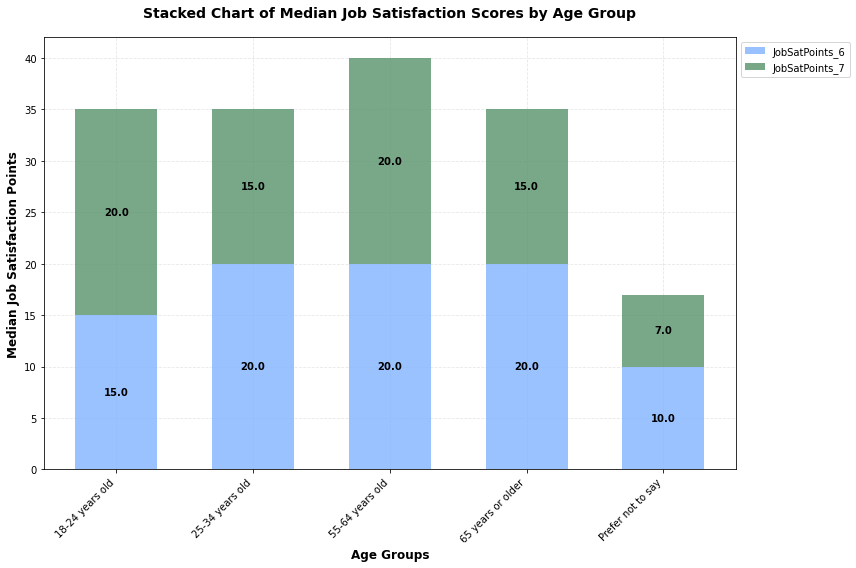

In [14]:
age_df = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()
median_data = age_df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# manually set age order
age_order = ['18-24 years old', '25-34 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
median_data = median_data.reindex(age_order)

# plot
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#80B3FF', '#57926c']  

x = np.arange(len(median_data.index))
width = 0.6

bars1 = ax.bar(x, median_data['JobSatPoints_6'], width, 
               label='JobSatPoints_6', color=colors[0], alpha=0.8)
bars2 = ax.bar(x, median_data['JobSatPoints_7'], width, 
               bottom=median_data['JobSatPoints_6'], 
               label='JobSatPoints_7', color=colors[1], alpha=0.8)

# Customize the chart
ax.set_xlabel('Age Groups', fontsize=12, fontweight='bold')
ax.set_ylabel('Median Job Satisfaction Points', fontsize=12, fontweight='bold')
ax.set_title('Stacked Chart of Median Job Satisfaction Scores by Age Group', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(median_data.index, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    ax.text(bar1.get_x() + bar1.get_width()/2., height1/2,
            f'{height1:.1f}', ha='center', va='center', fontweight='bold')
    
    height2 = bar2.get_height()
    ax.text(bar2.get_x() + bar2.get_width()/2., height1 + height2/2,
            f'{height2:.1f}', ha='center', va='center', fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()

plt.show()

### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [16]:
df.Employment.unique()

array(['Employed, full-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Student, part-time;Employed, part-time', 'I prefer not to say',
       'Not employed, but looking for work', 'Student, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, par

In [59]:
# define function to create a new column that takes only the highest level of employment in each response
def categorize_employment(value):
    if pd.isna(value):
        return np.nan
    
    val = value.lower()
    
    if "full-time" in val:
        return "Employed Full-Time"
    elif "part-time" in val:
        return "Employed Part-Time"
    elif "student" in val:
        return "Student"
    elif "independent contractor" in val or "freelancer" in val or "self-employed" in val:
        return "Independent/Freelancer"
    elif "not employed, but looking" in val:
        return "Not Employed-Seeking"
    elif "not employed, and not looking" in val:
        return "Not Employed-Not Seeking"
    elif "retired" in val:
        return "Retired"
    else:
        return "Other/Mixed"
    
df["EmploymentGroup"] = df["Employment"].apply(categorize_employment)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,EmploymentGroup
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed Full-Time
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Employed Full-Time
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,Employed Full-Time
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,Employed Full-Time
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN,Employed Full-Time


In [20]:
df.EmploymentGroup.unique()

array(['Employed Full-Time', 'Independent/Freelancer',
       'Employed Part-Time', 'Not Employed-Seeking'], dtype=object)

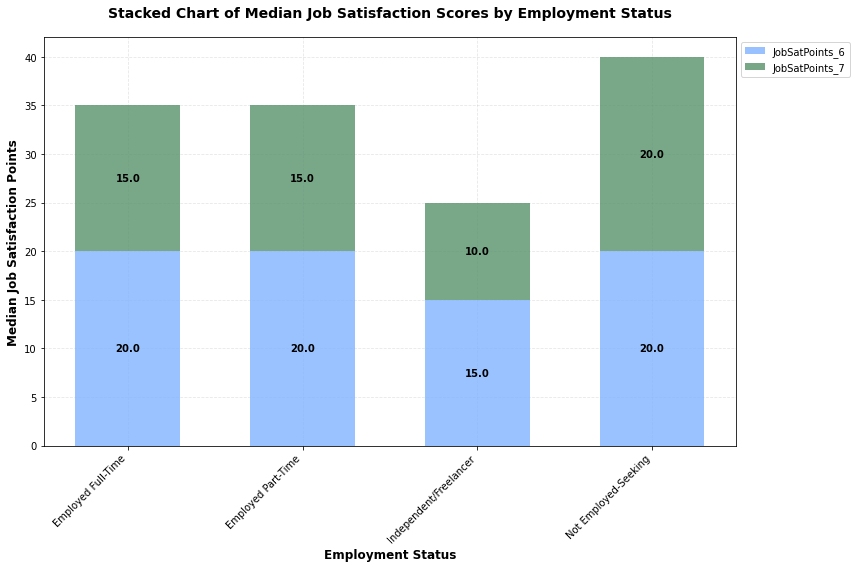

In [25]:
df_emp = df[['EmploymentGroup', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()
median_data = df_emp.groupby('EmploymentGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# plot
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#80B3FF', '#57926c']  

x = np.arange(len(median_data.index))
width = 0.6

bars1 = ax.bar(x, median_data['JobSatPoints_6'], width, 
               label='JobSatPoints_6', color=colors[0], alpha=0.8)
bars2 = ax.bar(x, median_data['JobSatPoints_7'], width, 
               bottom=median_data['JobSatPoints_6'], 
               label='JobSatPoints_7', color=colors[1], alpha=0.8)

# Customize the chart
ax.set_xlabel('Employment Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Median Job Satisfaction Points', fontsize=12, fontweight='bold')
ax.set_title('Stacked Chart of Median Job Satisfaction Scores by Employment Status', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(median_data.index, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    ax.text(bar1.get_x() + bar1.get_width()/2., height1/2,
            f'{height1:.1f}', ha='center', va='center', fontweight='bold')
    
    height2 = bar2.get_height()
    ax.text(bar2.get_x() + bar2.get_width()/2., height1 + height2/2,
            f'{height2:.1f}', ha='center', va='center', fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()

plt.show()



### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


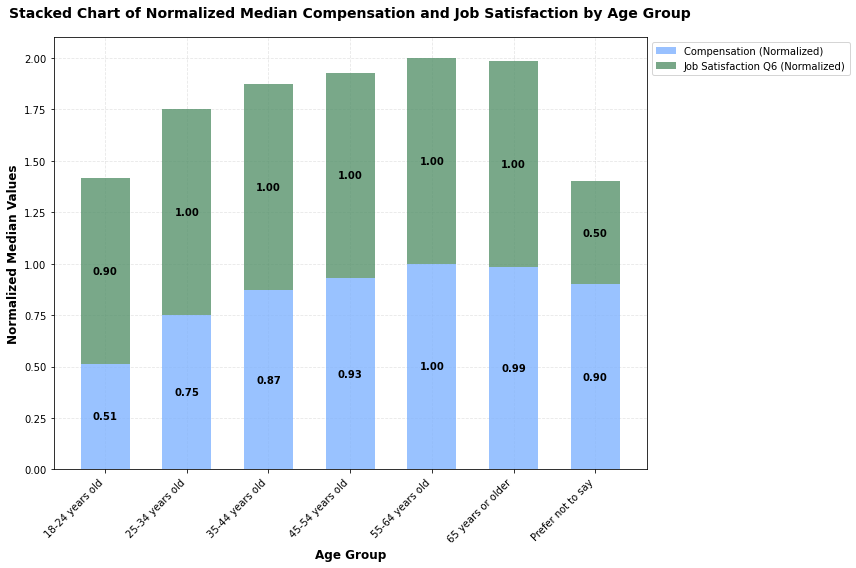

In [48]:
age_comp_jsat = df[['Age', 'CompTotal', 'JobSatPoints_6']].dropna()

# age group in correct order
age_order = [
    '18-24 years old', 
    '25-34 years old', 
    '35-44 years old',
    '45-54 years old',
    '55-64 years old', 
    '65 years or older', 
    'Prefer not to say'
]
age_comp_jsat['Age'] = pd.Categorical(age_comp_jsat['Age'], categories=age_order, ordered=True)

# calculate medians
summary = age_comp_jsat.groupby('Age')[['CompTotal', 'JobSatPoints_6']].median().dropna()

# normalize data since compensation and satisfaction are on largely different scales
summary_norm = summary / summary.max()

# plot
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#80B3FF', '#57926c']  # same palette

x = np.arange(len(summary_norm.index))
width = 0.6

bars1 = ax.bar(x, summary_norm['CompTotal'], width, 
               label='Compensation (Normalized)', color=colors[0], alpha=0.8)
bars2 = ax.bar(x, summary_norm['JobSatPoints_6'], width, 
               bottom=summary_norm['CompTotal'], 
               label='Job Satisfaction Q6 (Normalized)', color=colors[1], alpha=0.8)

ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Normalized Median Values', fontsize=12, fontweight='bold')
ax.set_title('Stacked Chart of Normalized Median Compensation and Job Satisfaction by Age Group', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(summary_norm.index, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    h1 = bar1.get_height()
    ax.text(bar1.get_x() + bar1.get_width()/2., h1/2,
            f'{h1:.2f}', ha='center', va='center', fontweight='bold')
    
    h2 = bar2.get_height()
    ax.text(bar2.get_x() + bar2.get_width()/2., h1 + h2/2,
            f'{h2:.2f}', ha='center', va='center', fontweight='bold')


ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()


### Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


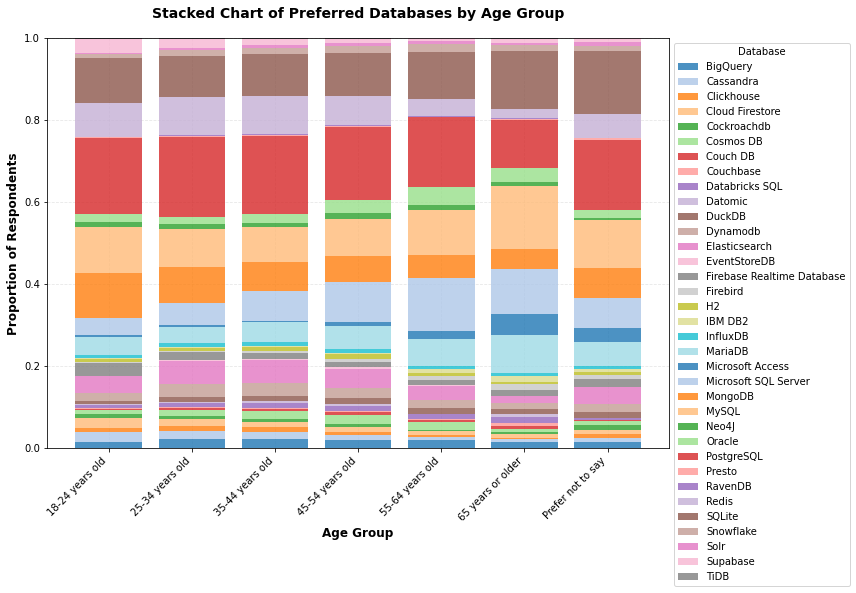

In [55]:
# plotted normalized as proportions for better visualization (see alternative below)
df_databases = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# ordered age groups
age_order = ['18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
df_databases = df_databases[df_databases['Age'].isin(age_order)]

# separate db responses
df_databases['DatabaseWantToWorkWith'] = df_databases['DatabaseWantToWorkWith'].str.split(';')
df_expanded = df_databases.explode('DatabaseWantToWorkWith')
df_expanded['DatabaseWantToWorkWith'] = df_expanded['DatabaseWantToWorkWith'].str.strip()

# counts for database preferences by age
db_counts = pd.crosstab(df_expanded['Age'], df_expanded['DatabaseWantToWorkWith'])

# normalize to get proportions
db_props = db_counts.div(db_counts.sum(axis=1), axis=0)
db_props = db_props.reindex(age_order)

# plot
fig, ax = plt.subplots(figsize=(12, 8))

bottom_vals = np.zeros(len(db_props))
x = np.arange(len(db_props))
colors = plt.cm.tab20.colors

for i, column in enumerate(db_props.columns):
    values = db_props[column].values
    bars = ax.bar(x, values, bottom=bottom_vals, label=column, 
                  color=colors[i % len(colors)], alpha=0.8)
    bottom_vals += values

ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Proportion of Respondents', fontsize=12, fontweight='bold')
ax.set_title('Stacked Chart of Preferred Databases by Age Group', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(db_props.index, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Database')

ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


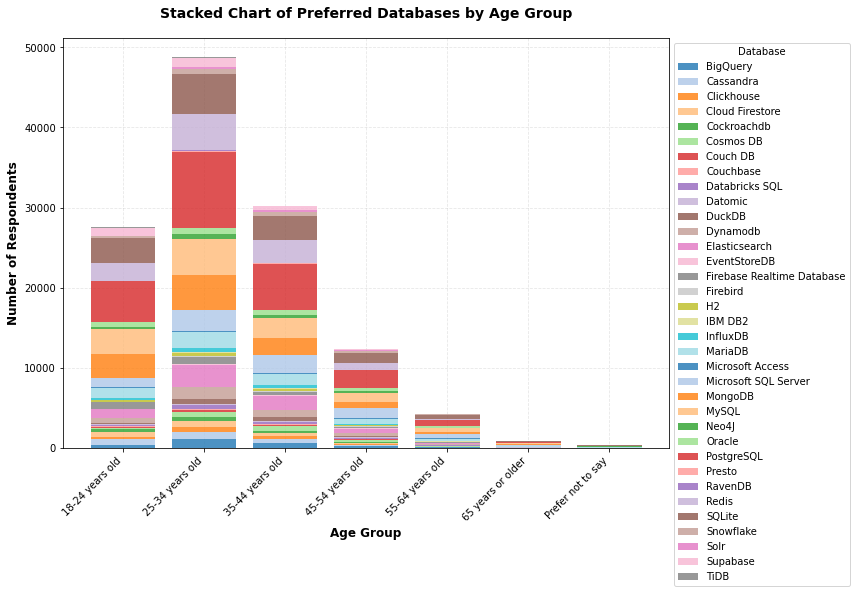

In [57]:
df_databases = df[['Age', 'DatabaseWantToWorkWith']].dropna()

age_order = ['18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
df_databases = df_databases[df_databases['Age'].isin(age_order)]

df_databases['DatabaseWantToWorkWith'] = df_databases['DatabaseWantToWorkWith'].str.split(';')
df_expanded = df_databases.explode('DatabaseWantToWorkWith')
df_expanded['DatabaseWantToWorkWith'] = df_expanded['DatabaseWantToWorkWith'].str.strip()

db_counts = pd.crosstab(df_expanded['Age'], df_expanded['DatabaseWantToWorkWith'])
db_counts = db_counts.reindex(age_order)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

bottom_vals = np.zeros(len(db_counts))
x = np.arange(len(db_counts))
colors = plt.cm.tab20.colors

# stack each database as a bar segment
for i, column in enumerate(db_counts.columns):
    values = db_counts[column].values
    bars = ax.bar(x, values, bottom=bottom_vals, label=column, 
                  color=colors[i % len(colors)], alpha=0.8)
    bottom_vals += values

ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Respondents', fontsize=12, fontweight='bold')
ax.set_title('Stacked Chart of Preferred Databases by Age Group', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(db_counts.index, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Database')

ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


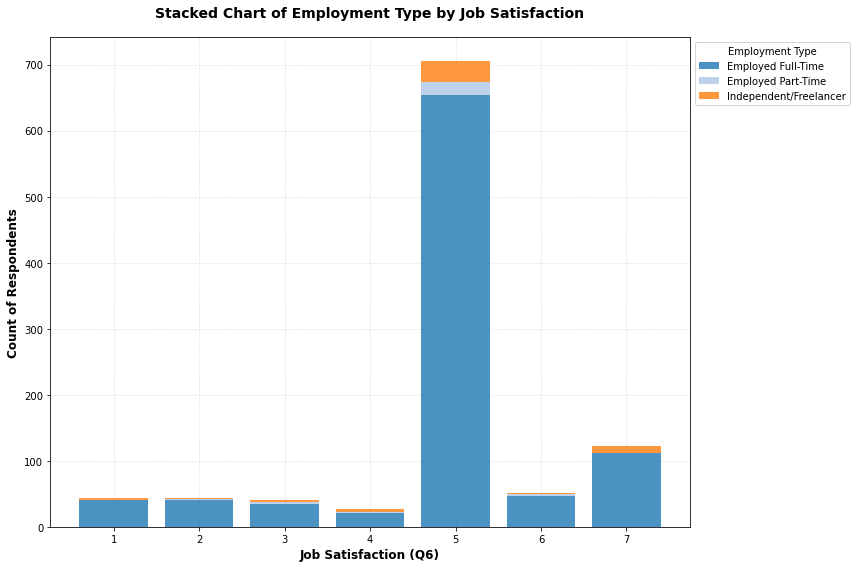

In [62]:
df_emp = df[['JobSatPoints_6', 'EmploymentGroup']].dropna()

sat_order = [1, 2, 3, 4, 5, 6, 7]
df_emp = df_emp[df_emp['JobSatPoints_6'].isin(sat_order)]

# crosstab to get counts of employment types by satisfaction level
emp_counts = pd.crosstab(df_emp['JobSatPoints_6'], df_emp['EmploymentGroup'])
emp_counts = emp_counts.reindex(sat_order)

# plot
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(emp_counts))
bottom_vals = np.zeros(len(emp_counts))
colors = plt.cm.tab20.colors

for i, column in enumerate(emp_counts.columns):
    values = emp_counts[column].values
    ax.bar(x, values, bottom=bottom_vals, label=column, 
           color=colors[i % len(colors)], alpha=0.8)
    bottom_vals += values

ax.set_xlabel('Job Satisfaction (Q6)', fontsize=12, fontweight='bold')
ax.set_ylabel('Count of Respondents', fontsize=12, fontweight='bold')
ax.set_title('Stacked Chart of Employment Type by Job Satisfaction', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(emp_counts.index)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Employment Type')

ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


### Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


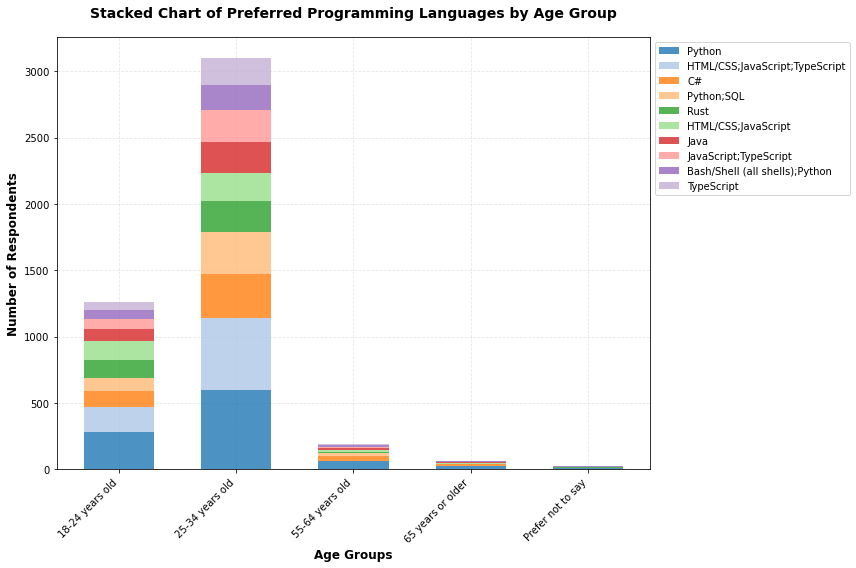

In [72]:
age_order = ['18-24 years old', '25-34 years old', '55-64 years old', '65 years or older', 'Prefer not to say']

lang_df = df[['Age', 'LanguageAdmired']].dropna()
lang_df = lang_df[lang_df['Age'].isin(age_order)]

# count number of respondents per age group per language
counts = lang_df.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)
counts = counts.reindex(age_order)

# top 10 languages for better readability
top_langs = counts.sum().sort_values(ascending=False).head(10).index
counts_top = counts[top_langs]

fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.tab20.colors

x = np.arange(len(counts_top.index))
width = 0.6

bottoms = np.zeros(len(counts_top))
bars = []
for i, lang in enumerate(counts_top.columns):
    bars.append(ax.bar(x, counts_top[lang], width, bottom=bottoms,
                       label=lang, color=colors[i], alpha=0.8))
    bottoms += counts_top[lang].values

ax.set_xlabel('Age Groups', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Respondents', fontsize=12, fontweight='bold')
ax.set_title('Stacked Chart of Preferred Programming Languages by Age Group',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(counts_top.index, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()


### Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [74]:
df.PlatformAdmired.unique()

array([nan, 'Amazon Web Services (AWS);Heroku;Netlify', 'Google Cloud',
       ..., 'Firebase;Microsoft Azure;Netlify;Vercel',
       'Amazon Web Services (AWS);Google Cloud;Heroku;Linode, now Akamai;Vercel',
       'PythonAnywhere;Render;Vercel'], dtype=object)

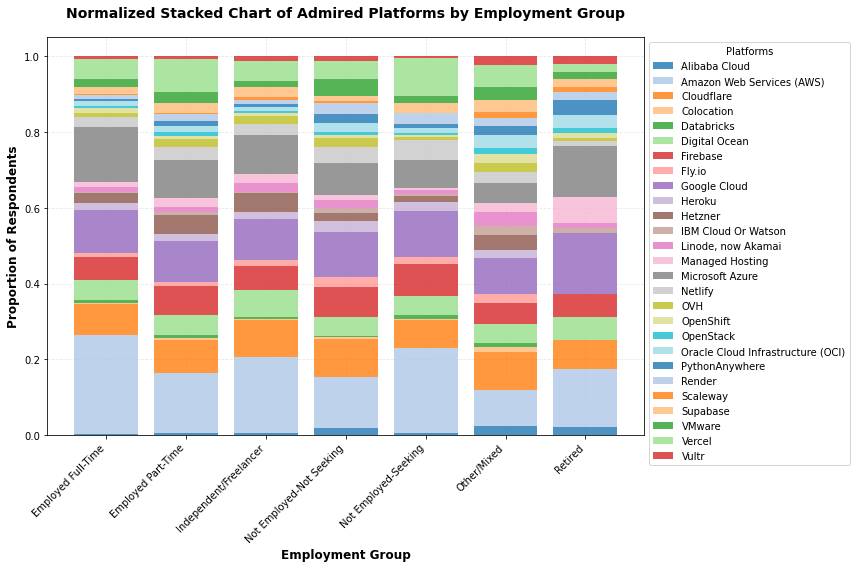

In [78]:
df_tech_emp = df[['PlatformAdmired', 'EmploymentGroup']].dropna()

# clean languages
df_tech_emp['PlatformAdmired'] = df_tech_emp['PlatformAdmired'].str.split(';')
tech_df_exp = df_tech_emp.explode('PlatformAdmired')
tech_df_exp['PlatformAdmired'] = tech_df_exp['PlatformAdmired'].str.strip()

# group and count
counts = tech_df_exp.groupby(['EmploymentGroup', 'PlatformAdmired']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(counts_norm.index))
bottom_vals = np.zeros(len(counts_norm.index))
colors = plt.cm.tab20.colors

for i, platform in enumerate(counts_norm.columns):
    values = counts_norm[platform].values
    ax.bar(x, values, bottom=bottom_vals, label=platform,
           color=colors[i % len(colors)], alpha=0.8)
    bottom_vals += values

ax.set_xlabel('Employment Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Proportion of Respondents', fontsize=12, fontweight='bold')
ax.set_title('Normalized Stacked Chart of Admired Platforms by Employment Group',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(counts_norm.index, rotation=45, ha='right')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Platforms')

ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


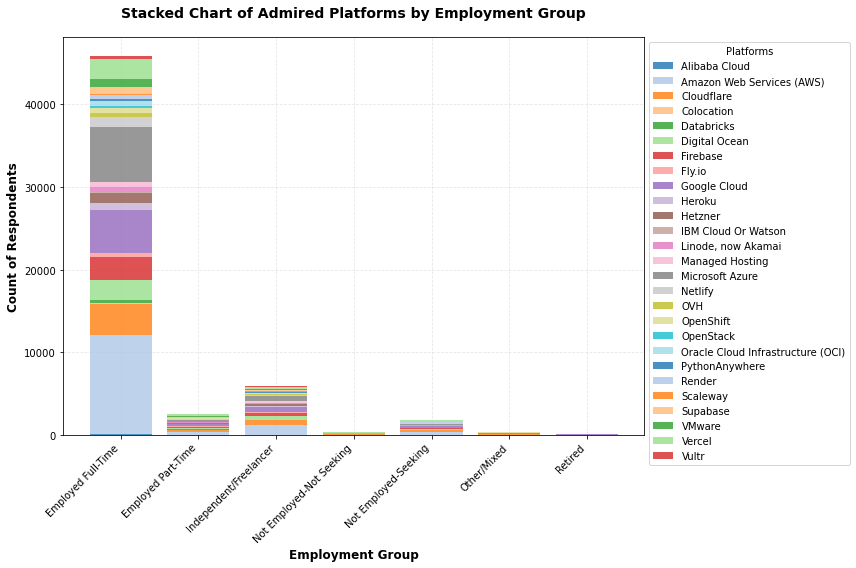

In [76]:
df_tech_emp = df[['PlatformAdmired', 'EmploymentGroup']].dropna()

# clean languages
df_tech_emp['PlatformAdmired'] = df_tech_emp['PlatformAdmired'].str.split(';')
tech_df_exp = df_tech_emp.explode('PlatformAdmired')
tech_df_exp['PlatformAdmired'] = tech_df_exp['PlatformAdmired'].str.strip()

# group and count
counts = tech_df_exp.groupby(['EmploymentGroup', 'PlatformAdmired']).size().unstack(fill_value=0)

employment_order = counts.index.tolist()  # or specify a custom order list if you want
counts = counts.reindex(employment_order)

# plot 
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(counts.index))
bottom_vals = np.zeros(len(counts.index))
colors = plt.cm.tab20.colors

bars = []
for i, platform in enumerate(counts.columns):
    values = counts[platform].values
    bars.append(ax.bar(x, values, bottom=bottom_vals, label=platform,
                       color=colors[i % len(colors)], alpha=0.8))
    bottom_vals += values

ax.set_xlabel('Employment Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Count of Respondents', fontsize=12, fontweight='bold')
ax.set_title('Stacked Chart of Admired Platforms by Employment Group',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(counts.index, rotation=45, ha='right')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Platforms')

ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
